In [1]:
import sys

IN_COLAB = 'google.colab' in sys.modules
RUN_TRAINING_CELLS = IN_COLAB

EXPERIMENT_NAME = 'Covid_NonCovid_image_classification/'
DRIVE_FOLDER_LOCATION = '/content/drive/My Drive/My projects/' + EXPERIMENT_NAME

In [2]:
# Mounting google drive
if IN_COLAB:
    from google.colab import drive

    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importing Libraries

In [3]:
import glob
import os
import pandas as pd
from numpy import expand_dims
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from matplotlib import pyplot

# Creating Dataframe for Non_Covid type image files

In [4]:
Non_Covid=[]
img_path=[]
for i in glob.glob("/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/non-COVID/"+'*.png'):
  img_path.append(i)
  label='Non-covid'
  Non_Covid.append(label)

In [5]:
dict1={"File":img_path,"Labels":Non_Covid}

data1=pd.DataFrame(dict1)
data1.head()

,File,Labels
0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
3,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
4,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid


# Creating Dataframe for Covid type image files

In [6]:
Covid=[]
img_path_covid=[]
for i in glob.glob("/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/COVID/"+'*.png'):
  img_path_covid.append(i)
  label='Covid'
  Covid.append(label)

In [7]:
dict2={"File":img_path_covid,"Labels":Covid}

data2=pd.DataFrame(dict2)
data2.head(3)

,File,Labels
0,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
1,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2,/content/drive/MyDrive/My projects/Covid_or_no...,Covid


# Adding two dataframes to get final dataframe

In [8]:
master_data=pd.concat([data1,data2])
master_data.head(3)

,File,Labels
0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid


In [9]:
master_data.reset_index(inplace=True)
master_data

,index,File,Labels
0,0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
3,3,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
4,4,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
...,...,...,...
2475,1246,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2476,1247,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2477,1248,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2478,1249,/content/drive/MyDrive/My projects/Covid_or_no...,Covid


In [10]:
master_data.to_csv('master_data.csv',index=False)

In [11]:
import sklearn

In [12]:
m_data=pd.read_csv('/content/master_data.csv')

In [13]:
m_data

,index,File,Labels
0,0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
3,3,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
4,4,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
...,...,...,...
2475,1246,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2476,1247,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2477,1248,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2478,1249,/content/drive/MyDrive/My projects/Covid_or_no...,Covid


In [14]:
# randomly shuffling 
m_data=sklearn.utils.shuffle(m_data)
m_data

,index,File,Labels
966,966,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
275,275,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
788,788,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
320,320,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
821,821,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
...,...,...,...
385,385,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1388,159,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
1781,552,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
897,897,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid


In [15]:
x=m_data.values
cols=m_data.columns.values

df_train=x[:int(len(x)*.55)]
df_val=x[int(len(x)*.55):int(len(x)*.90)]
df_eval=x[int(len(x)*.90):]
df_train=pd.DataFrame(df_train,columns=cols)
df_val=pd.DataFrame(df_val,columns=cols)
df_eval=pd.DataFrame(df_eval,columns=cols)

In [16]:
df_train.to_csv("Covid.csv",index=False)
df_val.to_csv("Covid_val.csv",index=False)
df_eval.to_csv("Covid_eval.csv",index=False)

In [17]:
import shutil

In [18]:
for i in df_train['File']:
  shutil.copy(i,'/content/drive/MyDrive/training_folder')

In [19]:
for i in df_val['File']:
  shutil.copy(i,'/content/drive/MyDrive/test_folder (1)')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images are brought down to same scale which makes model to train efficiently

In [21]:
datagen=ImageDataGenerator(rescale=1./255)

# Created train_generator which contain covid & non_covid type image files for training of the model

In [22]:
train_generator=datagen.flow_from_dataframe(dataframe=df_train,directory='/content/drive/MyDrive/training_folder',
                                            x_col='File',
                                            y_col='Labels',
                                            class_mode='binary',
                                            batch_size=4,
                                            target_size=(224,224))

Found 1364 validated image filenames belonging to 2 classes.


# Created test_generator which contain Covid & non_covid type files to check accuracy of trained model

In [23]:
validation_generator=datagen.flow_from_dataframe(dataframe=df_val,directory='/content/drive/MyDrive/test_folder (1)',
                                            x_col='File',
                                            y_col='Labels',
                                            class_mode='binary',
                                            batch_size=4,
                                            target_size=(224,224))

Found 868 validated image filenames belonging to 2 classes.


In [24]:
test_generator=datagen.flow_from_dataframe(dataframe=df_eval,directory='/content/drive/MyDrive/test_folder (1)',
                                            x_col='File',
                                            y_col='Labels',
                                            class_mode='binary',
                                            batch_size=4,
                                            target_size=(224,224))

Found 248 validated image filenames belonging to 2 classes.


### Data augmentation techniques which create multiple images from original images so that deep learning model becomes robust ( normally we apply this technique when our image dataset is unclear or not sufficient) <br> Here, we have sufficient amount of images so we can also train model without augmentation

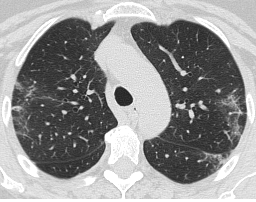

In [25]:
# let's take single image and apply different augmentation techniques on it (we can also apply multiple images and require to store in training directory)
img=load_img('/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/COVID/Covid (1).png')
img

In [26]:
data=img_to_array(img)
data

array([[[190., 190., 190.],
        [197., 197., 197.],
        [202., 202., 202.],
        ...,
        [200., 200., 200.],
        [191., 191., 191.],
        [193., 193., 193.]],

       [[189., 189., 189.],
        [196., 196., 196.],
        [194., 194., 194.],
        ...,
        [202., 202., 202.],
        [200., 200., 200.],
        [188., 188., 188.]],

       [[195., 195., 195.],
        [202., 202., 202.],
        [199., 199., 199.],
        ...,
        [197., 197., 197.],
        [194., 194., 194.],
        [190., 190., 190.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

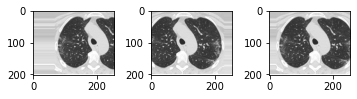

In [27]:
# For width shift
samples=expand_dims(data,0)
datagen=ImageDataGenerator(width_shift_range=0.3)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

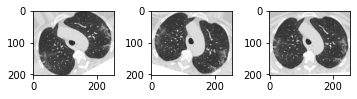

In [28]:
# For rotation
samples=expand_dims(data,0)
datagen=ImageDataGenerator(rotation_range=40)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

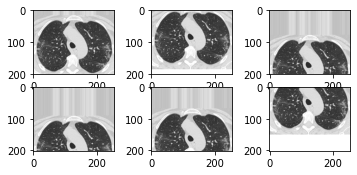

In [29]:
# For height shift
samples=expand_dims(data,0)
datagen=ImageDataGenerator(height_shift_range=90)
it=datagen.flow(samples,batch_size=1)
for i in range(6):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

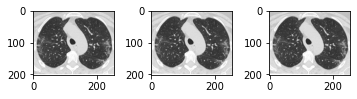

In [30]:
# For shear_range
samples=expand_dims(data,0)
datagen=ImageDataGenerator(shear_range=3)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

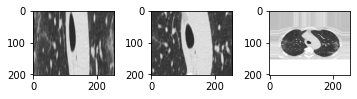

In [31]:
# For zoom range
samples=expand_dims(data,0)
datagen=ImageDataGenerator(zoom_range=1)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

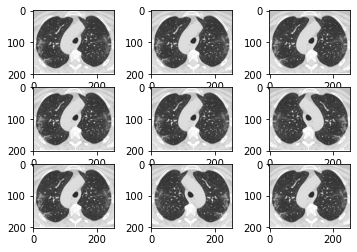

In [32]:
# For horizontal flip
# For zoom range
samples=expand_dims(data,0)
datagen=ImageDataGenerator(horizontal_flip=3)
it=datagen.flow(samples,batch_size=1)
for i in range(9):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

In [33]:
# Let's combine these all augmentation techniques and save these images in directory which is augmented images
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.3,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

img=load_img('/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/COVID/Covid (1).png')
x=img_to_array(img)
x=x.reshape((1,)+x.shape)

counter=0

for i in datagen.flow(x,batch_size=1,
                      save_to_dir='/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Augmented images',save_prefix='Covid',save_format='png'):
  counter+=1
  if counter>10:
    break


# Import ResNet model and train our model on these images

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dropout,Dense, Activation, ZeroPadding2D,\
               BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
# loading ResNet50
# Loading the pretrained model without the output of the last convolution block 
model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights = 'imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [36]:
for layer in model.layers:
  layer.trainable=False

In [37]:
x=model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_final=Model(model.input,prediction)

In [41]:
#Compile Model
model_final.compile(optimizer = "adam",loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
checkpoint=ModelCheckpoint("ResNet.h5",monitor='val_loss',save_best_only=True,save_weights_only=False,mode='auto',period=1)
early=EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=7,mode='auto')

In [62]:
batch_size=4

In [58]:
len(df_train)

1364

In [59]:
len(df_eval)

248

In [63]:
steps_per_epoch=len(df_train)//batch_size
validation_steps=len(df_val)//batch_size

In [67]:
history=model_final.fit_generator(generator=train_generator,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=validation_generator,
                                  validation_steps=validation_steps,
                                  epochs=100,
                                  callbacks=[checkpoint,early])

Epoch 1/100
  1/341 [..............................] - ETA: 37s - loss: 0.7097 - accuracy: 0.2500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


341/341 [==============================] - 23s 68ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6964 - val_accuracy: 0.4608
Epoch 2/100
341/341 [==============================] - 22s 64ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6961 - val_accuracy: 0.4608
Epoch 3/100
341/341 [==============================] - 22s 66ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6960 - val_accuracy: 0.4608
Epoch 4/100
341/341 [==============================] - 22s 66ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6962 - val_accuracy: 0.4608
Epoch 5/100
341/341 [==============================] - 22s 64ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6960 - val_accuracy: 0.4608
Epoch 6/100
341/341 [==============================] - 22s 63ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6963 - val_accuracy: 0.4608
Epoch 7/100
341/341 [==============================] - 22s 64ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6961 - val_accuracy: 0.46